<a href="https://colab.research.google.com/github/icarusoars/stat430/blob/master/HW/hw01-jingtao2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview 

Please see the [homework policy](https://fdl.thecoatlessprofessor.com/syllabus/#homework)
for detailed instructions and some grading notes. Failure to follow instructions
will result in point reductions. In particular, make sure to commit each 
exercise as you complete them. 

> "The future depends on some graduate student who is deeply suspicious of everything I have said."
> 
> -- Geoffrey Hinton (One of Deep Learning's Godfathers)

## Grading

The rubric CAs will use to grade this assignment is:

| Task                                                   | Pts |
|:-------------------------------------------------------|----:|
| Homework Policy                                        | 2   |
| Splitting the Bill                                     | 10  |
| I _vant_ to _manually_ read your data                  | 5   |
| Excellency at UIUC                                     | 20  |
| Total                                                  | 37  |


## Objectives 

The objectives behind this homework assignment are as follows:

- Implement functions in Python;
- Loading CSV data;
- Manipulating data; and,
- Visualizing Data.

# Assignment - Homework 1
STAT 430 - FDL, Spring 2020

Due: **Friday, February 7th, 2020 at 6:00 PM**

- **Author: Skyler Shi**
- **NetID: jingtao2**

### Collaborators

If you worked with any other student in preparing these answers, please
make sure to list their full names and NetIDs (e.g. `FirstName LastName (NetID)` ).


In [0]:
print("Diagnostics: ")

try:
  from google.colab import drive
  is_google_colab = True
  import sys
  import pandas as pd
  import numpy as np

  print(f"python: {sys.version}")
  print(f"pandas: {np.__version__}")
  print("Notebook is on Google CoLab")
except:
  is_google_colab = False
  print("Notebook is begin run locally or through another source.")




Diagnostics: 
Notebook is begin run locally or through another source.


## [2 points] Exercise 1: Homework Policy

Please uncomment the following statement when you have read and agreed
to the [homework policy](https://fdl.thecoatlessprofessor.com/syllabus/#homework/).
To _uncomment_ a statement in _text cell_, double click the _text cell_ and remove the `<!-- -->` surrounding the content.


I have read and agree to abide by the policies and procedures laid 
out by the [homework policy](https://fdl.thecoatlessprofessor.com/syllabus/#homework/).
                               
I understand that:

- I must independently write up solutions to homework problems.
    - Failure to do so will result in an academic integrity violation due to plagarism and more severe penalties.
- I must list the names of all collaborators that I work with at the top of my homework assignment.
- I understand that I can work with **at most** four other students in class. 
- I must supply my full name and netid at the top of the homework assignments.
- I will change the name of the Jupyter Notebook from `hwXX-assign.ipynb` to `hwXX-NetId.ipynb`.
- All code cells must be evaluated. 
- I will turn in my homework by uploading to Canvas.
    - There is no paper or e-mail turn-in available. 
- I understand that at 6:00 PM central time on the day the homework is due my ability to upload the assignment will be disabled
    - Any work not in the upload will _not_ be graded.
    - Any code cell not run, will not be graded.
- I will be able to drop **one** homework assignment over the course of the 
  semester. 
- I understand that any academic integrity violations (cheating or assisting others)
  will be punished to ensure a fair academic environment for all.



## [10 points] Exercise 2: Splitting the Bill

Develop a function that displays an itemized bill and provides the total a given person must pay.

Consider the following bill:

- James
  - Cold Brew: \$4.63
  - [Beef Bulgogi](https://en.wikipedia.org/wiki/Bulgogi): \$12.32
- Brianna
  - Tea: \$2.55
  - Muffin: \$1.88
  - [Poke bowl](https://en.wikipedia.org/wiki/Poke_(Hawaiian_dish)): \$10.69
- Cathy
  - [Margarita](https://en.wikipedia.org/wiki/Margarita): \$8.50

Implementation Guidelines:

- **Arguments:**
    - `x`: data structure holding the above example.
    - `first_name`: Obtain the total a given person owes.
- **Side-effect:**
    - Print an itemized version of the bill by person.
- **Return:**
    - The total value of all items ordered by requested person.

Example of output:

```python
bill_split(x, "James")
# Itemized Bill ----
# James pays $16.95
# * 4.63 for Cold Brew
# * 12.32 for Beef Bulgogi
# Brianna pays $15.12
# * 2.55 for Tea
# * 1.88 for Muffin
# * 10.69 for Poke Bowl
# Cathy pays $8.50
# * 8.50 for Margarita
# 16.95
```


In [0]:
import pandas as pd
import numpy as np

In [0]:
x = pd.DataFrame({
    'Name': ['James', 'James', 'Brianna', 'Brianna', 'Brianna', 'Cathy'],
    'Item': ['Cold Brew', 'Beef Bulgogi', 'Tea', 'Muffin', 'Poke Bowl', 'Magarita'],
    'Cost': [4.63, 12.32, 2.55, 1.88, 10.69, 8.50]
})

In [0]:
# Code
def bill_split(x, name):
    person_total = 0
    person_total = x[x.Name == name]['Cost'].sum()
    
    print("Itemized Bill ---")
    for name, group in x.groupby('Name'):
        print('{} pays {}'.format(name, group['Cost'].sum()))
        for idx, row in group.iterrows():
            print("   {} for {}".format(row['Cost'], row['Item']))
    
    return person_total

In [0]:
bill_split(x, "James")

Itemized Bill ---
Brianna pays 15.12
   2.55 for Tea
   1.88 for Muffin
   10.69 for Poke Bowl
Cathy pays 8.5
   8.5 for Magarita
James pays 16.95
   4.63 for Cold Brew
   12.32 for Beef Bulgogi


16.95


## [5 points] Exercise 3: I _vant_ to manually read your data

Consider the following [Fall 2019 Freshman profile](http://dmi.illinois.edu/stuenr/abstracts/FA19freshman_ten.htm) made available by the [Division of Management Information (DMI)](http://dmi.illinois.edu).

- **(3 Points)** Translate the table from `markdown` to a pandas `DataFrame`

|College               | Number| Percent|
|:---------------------|------:|-------:|
|Agr, Cons, Env Sci    |    538|   0.070|
|Applied Health Sci    |    287|   0.037|
|Business              |    591|   0.077|
|Education             |    138|   0.018|
|Fine & Applied Arts   |    381|   0.050|
|General Studies       |   1498|   0.195|
|Grainger Engineering  |   1628|   0.212|
|Liberal Arts & Sci    |   2411|   0.315|
|Media                 |    142|   0.019|
|School of Social Work |     51|   0.007|

- **(2 Points)** Progmatically, find the maximum number of students

In [0]:
students = pd.DataFrame(
    columns = ['College', 'Number', 'Percent'],
    data = [
        ['Agr, Cons, Env Sci', 538, 0.070],
        ['Applied Health Sci', 287, 0.037],
        ['Business', 591, 0.077],
        ['Education', 138, 0.018],
        ['Fine & Applied Arts', 381,0.050],
        ['General Studies', 1498,  0.195],
        ['Grainger Engineering' ,1628,0.212],
        ['Liberal Arts & Sci'  ,2411,0.315],
        ['Media'   ,142, 0.019],
        ['School of Social Work',51, 0.007]
    ]
)

In [0]:
students[students.Number == students.Number.max()]

,College,Number,Percent
7,Liberal Arts & Sci,2411,0.315


Liberal Arts college has the most number of students with 2411.




## [20 points] Exercise 4: Excellency at UIUC

Under this exercise, we will explore the "Teachers Ranked As Excellent" data
at UIUC from Fall 1993 to Summer 2019 as compiled by 
[Wade Fagen-Ulmschneider](http://waf.cs.illinois.edu/).
The data is available from:

<https://raw.githubusercontent.com/wadefagen/datasets/master/teachers-ranked-as-excellent/uiuc-tre-dataset.csv> 

This data has a file extension of **CSV** form. Contained in the data are the following variables:

- `term`: Two letter semester code (`sp`, `su`, `fa`, or `wi`) followed by a four digit year.
    - Examples: `sp2017`, `fa2013`, `su2012`.
- `unit`: The CITL-supplied headers for the unit teaching the course.
    - Examples: `ACCOUNTANCY`, `SOCIAL WORK`, `LINGUISTICS`, `NUCLEAR, PLASMA & RAD. ENGR.`
- `lname`: The last name of the teacher.
    - Examples: `FAGEN-ULMSCHNEIDER`, `FLANAGAN`, `FLECK`
- `fname`: The first letter of the first name of the teacher.
    - Examples: `W`, `K`, `M`
- `role`: `Instructor` or `TA`
- `ranking`: `Excellent` or `Outstanding`
- `course`: The course the teacher was ranked as excellent.  If no course is given, the `course` field is set to `?` (this includes cases when the raw data lists the course as `0`, `000`, or `999`).
    - Examples: `199`, `225`, `560`, `?`

**[2 points] (a)** Import into _Python_ the data in `uiuc-tre-dataset.csv`. As `course` denotes a value that is
_not_ `NaN`, which is how _Python_ represents missing values, you must use the parameter 
`na_values = ['NA','?'] ` during the import with pandas.




In [0]:
# Code
file_path = 'https://raw.githubusercontent.com/wadefagen/datasets/master/teachers-ranked-as-excellent/uiuc-tre-dataset.csv'
excel_teach = pd.read_csv(file_path, na_values = ['NA', '?'])

In [0]:
excel_teach.head()

,term,unit,lname,fname,role,ranking,course
0,fa2003,ACCOUNTANCY,BALLOU,B,Instructor,Excellent,304.0
1,fa2003,ACCOUNTANCY,CHANDLER,J,Instructor,Excellent,304.0
2,fa2003,ACCOUNTANCY,DEREUS,M,TA,Excellent,201.0
3,fa2003,ACCOUNTANCY,FARRELL,A,Instructor,Excellent,302.0
4,fa2003,ACCOUNTANCY,FELLER,A,Instructor,Excellent,310.0


**[4 points] (b)** Run a summary over the data. Within the summary
output, what variable output is different from the rest? What might have caused this?

In [0]:
# Code
excel_teach.describe(include = ['object', 'float', 'int'])

,term,unit,lname,role,ranking,course
count,96988,96988,96985,96988,96988,96988.00000
unique,72,296,14826,2,2,NaN
top,fa2017,MUSIC,KIM,Instructor,Excellent,NaN
freq,2933,4119,521,51314,63909,NaN
mean,NaN,NaN,NaN,NaN,NaN,298.40439
std,NaN,NaN,NaN,NaN,NaN,162.17553
min,NaN,NaN,NaN,NaN,NaN,2.00000
25%,NaN,NaN,NaN,NaN,NaN,144.00000
50%,NaN,NaN,NaN,NaN,NaN,260.00000
75%,NaN,NaN,NaN,NaN,NaN,426.00000


Variable difference explanation:
The variable **course** is different than others in that it is a numerical variable. **course** represents the course number so it doesn't need to be numerical necessarily. Pandas interpreting this column as numerical when reading the csv might have caused this.

**[4 points] (c)** 

1. Verify that `course` has `NaN` values. 
2. Perform a median imputation to remove `NaN` values.


In [0]:
# Code
excel_teach[excel_teach.course.isna()].head()

,term,unit,lname,fname,role,ranking,course
170,fa2003,AVIATION,BOWERS,T,Instructor,Excellent,NaN
171,fa2003,AVIATION,COWAN,E,Instructor,Excellent,NaN
172,fa2003,AVIATION,DANN MESSIER,D,Instructor,Outstanding,NaN
173,fa2003,AVIATION,FANONE,C,Instructor,Excellent,NaN
174,fa2003,AVIATION,FRANCIS,J,Instructor,Excellent,NaN


In [0]:
course_median = excel_teach.course.median()
excel_teach['course'] = excel_teach['course'].fillna(course_median)

In [0]:
excel_teach[excel_teach.course.isna()].head()

,term,unit,lname,fname,role,ranking,course



**[4 points] (d)** 

1. Who was your favorite teacher at UIUC? Search for them in the list of excellency. 
  - _Hint_: Search the `lname` variable in the `DataFrame`.
  - _Hint_: Make sure to search the _last name_ with capital letters.

2. Compute the total number of times they appeared in the excellency ratings.



In [0]:
# Code
excel_teach[excel_teach.lname == 'VEERAVALLI'].head()

,term,unit,lname,fname,role,ranking,course
2309,sp2007,ELECTRICAL AND COMPUTER ENGINEERING,VEERAVALLI,V,Instructor,Excellent,561.0
20834,fa2007,ELECTRICAL AND COMPUTER ENGINEERING,VEERAVALLI,V,Instructor,Excellent,559.0
26846,fa2010,ELECTRICAL AND COMPUTER ENGINEERING,VEERAVALLI,V,Instructor,Excellent,562.0
26847,fa2010,ELECTRICAL AND COMPUTER ENGINEERING,VEERAVALLI,V,Instructor,Excellent,563.0
28987,fa2013,ELECTRICAL AND COMPUTER ENGINEERING,VEERAVALLI,V,Instructor,Excellent,562.0


In [0]:
print("They've appeared {} times.".format(excel_teach[excel_teach.lname == 'VEERAVALLI'].shape[0]))

They've appeared 14 times.


**[2 points] (e)** Drop the `fname` column in-place.

In [0]:
# Code
excel_teach.drop('fname', axis = 1, inplace = True)

**[2 points] (f)** Split the data into a training and testing data set. The weight should be 65% training and 35% testing.

In [0]:
# Code

# Shuffle observations within the data set
# to avoid correlation between related rows
excel_teach = excel_teach.reindex(
    np.random.permutation(excel_teach.index)
)
# Randomly generate indices so that the data
# is split into 80/20
num_obs = len(excel_teach)
train_idx = np.random.rand(num_obs) < 0.65

# split the data
training_df = excel_teach[train_idx]
testing_df = excel_teach[~train_idx]

print(training_df.shape[0])
print(testing_df.shape[0])

62761
34227



**[2 points] (g)** Create a bar plot on `role` to see the counts of how often a `Instructor` or `TA` make the list.

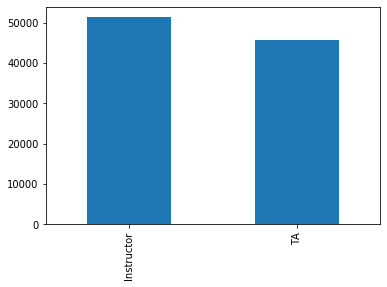

In [0]:
# Code
excel_teach['role'].value_counts().plot(kind = 'bar')